## Base Data

### World Bank Primary Education Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns

## Checklist

### For base dataset
- Why we use this dataset?
- structure of the data
- N/A data
- handling N/A Data
- data distribution for both target data

### ML Model
- ...

### Loading Base Data

In [5]:
base_data_df = pd.read_csv('./data/world_bank.csv')
base_data_df = base_data_df[['country', 'year', 'completion_rate']]
country_df = pd.read_csv('./data/country_info.csv')[['Country Code', 'Region', 'Income Group']]
country_df = country_df.rename(columns={'Country Code': 'country'})
data_df = pd.merge(base_data_df, country_df, on="country")

### Missing value

In [6]:
completion_rate_pivot = data_df.pivot(index='country', columns=['year'], values=['completion_rate'])

We could see from the table of example countries and the bar plot that there are a lot of missing value in the data and there is no common year which the data are all available.

In [7]:
completion_rate_pivot.loc[['USA', 'JPN', 'AUT', 'DEU', 'IND', 'THA']].transpose()

country                      USA  JPN         AUT         DEU        IND  \
                year                                                       
completion_rate 2000         NaN  NaN         NaN  104.346916  71.486107   
                2001         NaN  NaN         NaN  105.795708  72.169540   
                2002         NaN  NaN  100.222198  101.670143  75.560066   
                2003         NaN  NaN         NaN  100.681236  80.044380   
                2004         NaN  NaN   98.744301   99.470268        NaN   
                2005         NaN  NaN         NaN   96.879639        NaN   
                2006         NaN  NaN         NaN   98.496803        NaN   
                2007         NaN  NaN         NaN  103.536980        NaN   
                2008         NaN  NaN         NaN  101.979027  94.757584   
                2009         NaN  NaN         NaN  102.383797  95.746292   
                2010         NaN  NaN         NaN  102.015350        NaN   
                2011         NaN  NaN   96.772018  101.566879  92.763359   
                2012         NaN  NaN   96.693718   98.653137        NaN   
                2013         NaN  NaN   97.606010   98.398689  96.200890   
                2014         NaN  NaN   98.691849   97.282707  97.571121   
                2015         NaN  NaN  100.373787   98.918297  97.711319   
                2016         NaN  NaN   99.656723   97.937202  96.230698   
                2017   98.832199  NaN   99.453178   98.805138  94.373749   
                2018  100.092697  NaN   99.813004  100.843323        NaN   
                2019  100.489052  NaN   99.408501   99.017799  91.661491   
                2020         NaN  NaN         NaN         NaN  94.559128   

country                     THA  
                year             
completion_rate 2000  84.892181  
                2001  86.880768  
                2002        NaN  
                2003        NaN  
                2004        NaN  
                2005        NaN  
                2006        NaN  
                2007        NaN  
                2008        NaN  
                2009        NaN  
                2010        NaN  
                2011        NaN  
                2012        NaN  
                2013        NaN  
                2014        NaN  
                2015        NaN  
                2016        NaN  
                2017  93.452553  
                2018  93.420471  
                2019  94.411377  
                2020  95.063080

<AxesSubplot:xlabel='year', ylabel='missing_completion_rate'>

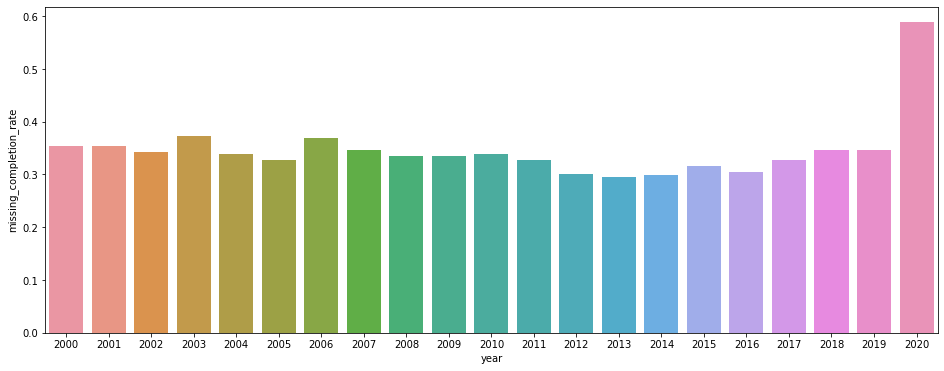

In [8]:
na_completion_rate = data_df.groupby('year').apply(lambda df: df.isna().mean())[['completion_rate']]
na_completion_rate = na_completion_rate.rename(columns={'completion_rate': 'missing_completion_rate'})
plt.figure(figsize=(16, 6))
sns.barplot(x=na_completion_rate.index, y=na_completion_rate['missing_completion_rate'])

Because of these, we will progress by treating each country and year as individual obeservation and drop all of the N/A. Also the 2020 data looks incomplete, so we will drop all 2020 as well.

In [ ]:
data_df = data_df.dropna()
data_df = data_df.set_index(['country', 'year'])
data_df = data_df.loc[(slice(None), slice(2010, 2019)), :]

### Target Variable Distribution

From, We could see the distribuition of the data have approximately the same structure. We have the mode at around 100% completion rate. Also there is a small peak at around 65%.

In [ ]:
sns.displot(data_df, x="completion_rate", hue="year", kind="kde")

In [ ]:
data_df_2019 = data_df.loc[(slice(None), slice(2019, 2019)),:]

In [ ]:
completion_country_income_level_df = data_df.groupby(['year', 'Income Group']).mean()

In [ ]:
g = sns.relplot(
    data=completion_country_income_level_df,
    x="year",
    y="completion_rate",
    hue="Income Group",
    kind="line",
)
g.set(ylim=(0, None))